# Growing population

veeery interesting yeash

In [1]:
# import dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from plot import plot_param_var_conf
from model import Environment
from batchrunner import BatchRunner

In [2]:
# run a batch, which can eihter grow or not
param_names = ['grow']
param_sets = [(True, ), (False, )]
fixed_params = {'p_uf': 0.95, 'p_pu': 0.1, 'p_up': 0.5, 'p_fl': 0.8, 'p_lu': 0.05, 'g': 0.3, 'ratio': 0.48, 'size': 11, 'N': 40}

model_reporters = {"dc": lambda m: m.dc.model_vars}
batch = BatchRunner(Environment,
                    fixed_parameters=fixed_params, max_steps=500,
                    iterations=100, model_reporters=model_reporters,
                    param_sets=param_sets, param_names=param_names)

batch.run_all(6)
data = batch.get_model_vars_dataframe()

100%|██████████| 200/200 [00:52<00:00,  9.32it/s]


In [3]:
# now extract the interesting params (in an extremely inefficient manner)
grown = data[data['grow'] == True]
stead = data[data['grow'] == False]
stead_vals = pd.DataFrame(columns=['time', 'pu_net', 'flu_net'])
grown_vals = pd.DataFrame(columns=['time', 'pu_net', 'flu_net'])

for run in stead['dc'].values:
    for i in range(len(run['pheromone'])):
        total = run['pheromone'][i] + run['leaders'][i] + run['followers'][i] + run['unassigned'][i]
        stead_vals = stead_vals.append(pd.Series([i, (run['pheromone'][i] - run['unassigned'][i])/total, (run['followers'][i] + run['leaders'][i] - run['unassigned'][i])/total], index=['time', 'pu_net', 'flu_net']), ignore_index=True)

for run in grown['dc'].values:
    for i in range(len(run['pheromone'])):
        total = run['pheromone'][i] + run['leaders'][i] + run['followers'][i] + run['unassigned'][i]
        grown_vals = grown_vals.append(pd.Series([i, (run['pheromone'][i] - run['unassigned'][i])/total, (run['followers'][i] + run['leaders'][i] - run['unassigned'][i])/total], index=['time', 'pu_net', 'flu_net']), ignore_index=True)

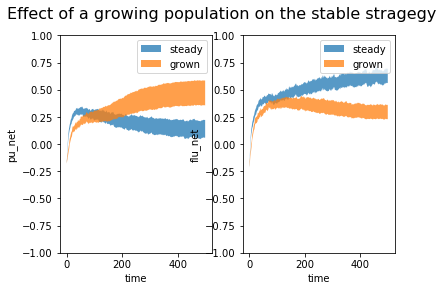

In [4]:
# show the results
fig = plt.figure(figsize=(16, 10))
plt.suptitle('Effect of a growing population on the stable stragegy', fontsize=16)

ax1 = fig.add_subplot(1, 2, 1)
plot_param_var_conf(ax1, stead_vals, 'time', 'pu_net', label='steady', alpha=0.75)
plot_param_var_conf(ax1, grown_vals, 'time', 'pu_net', label='grown', alpha=0.75)
plt.legend()
plt.ylim([-1, 1])

ax2 = fig.add_subplot(1, 2, 2)
plot_param_var_conf(ax2, stead_vals, 'time', 'flu_net', label='steady', alpha=0.75)
plot_param_var_conf(ax2, grown_vals, 'time', 'flu_net', label='grown', alpha=0.75)
plt.legend()
plt.ylim([-1, 1])

plt.show()